# Preprocessing of Dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('CarPricesPrediction.csv')

## 1. Reading data by Pandas Simple Operations

In [3]:
data.sample()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
982,982,Toyota,Altima,2014,107263,Excellent,22636.95


In [4]:
data.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [5]:
data.tail()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90
999,999,Nissan,Silverado,2017,128390,Excellent,18580.60


## Checking Data Types  and Information

In [6]:
data.dtypes

Unnamed: 0      int64
Make           object
Model          object
Year            int64
Mileage         int64
Condition      object
Price         float64
dtype: object

In [7]:
data.describe()

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


## 2. Data Cleaning

## Checking Null Values

In [9]:
data.isnull().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

__Separate numeric and non-numeric columns__

In [10]:
numeric_cols=data.select_dtypes(include=[np.number])
non_numeric_cols=data.select_dtypes(exclude=[np.number])

__Fill missing values in numeric columns with the mean and non_numeric by mode__

In [11]:
numeric_cols.fillna(numeric_cols.mean(),inplace=True)
non_numeric_cols.fillna(non_numeric_cols.mode().iloc[0], inplace=True)


__Combine back with non-numeric columns__

In [12]:
data=pd.concat([numeric_cols,non_numeric_cols],axis=1)

In [13]:
data.isnull().sum()

Unnamed: 0    0
Year          0
Mileage       0
Price         0
Make          0
Model         0
Condition     0
dtype: int64

## Droping Missing Values and Duplicate values and unnamed columns


__In this case there is no missing value column so we do not do this process__

In [14]:
# data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1000 non-null   int64  
 1   Mileage    1000 non-null   int64  
 2   Price      1000 non-null   float64
 3   Make       1000 non-null   object 
 4   Model      1000 non-null   object 
 5   Condition  1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


## Checking shape of data

In [15]:
data.shape

(1000, 6)

# 3. Checking Outliers

__Calculate IQR__

- __Filter out outliers__

In [16]:
numeric_cols = data.select_dtypes(include=['float64']).columns
mask = pd.Series(True, index=data.index)

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = mask & data[col].between(lower_bound, upper_bound)

data_cleaned = data[mask]


__Visualizing the data before outlier removal__

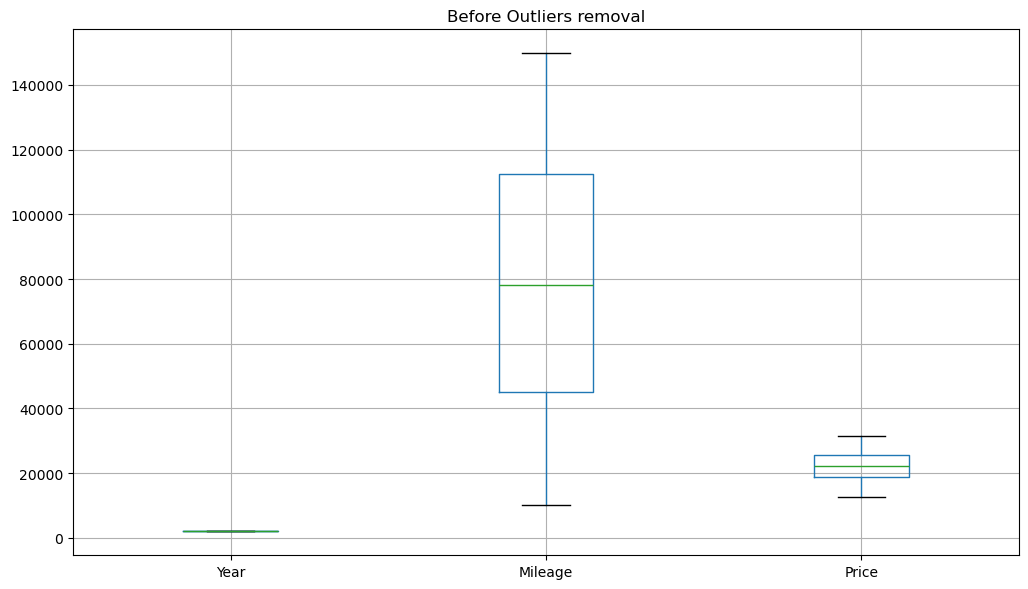

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data.boxplot()
plt.title("Before Outliers removal")
plt.tight_layout()
plt.show()

## Removing Outliers

__Visualizing the data after outlier removal__

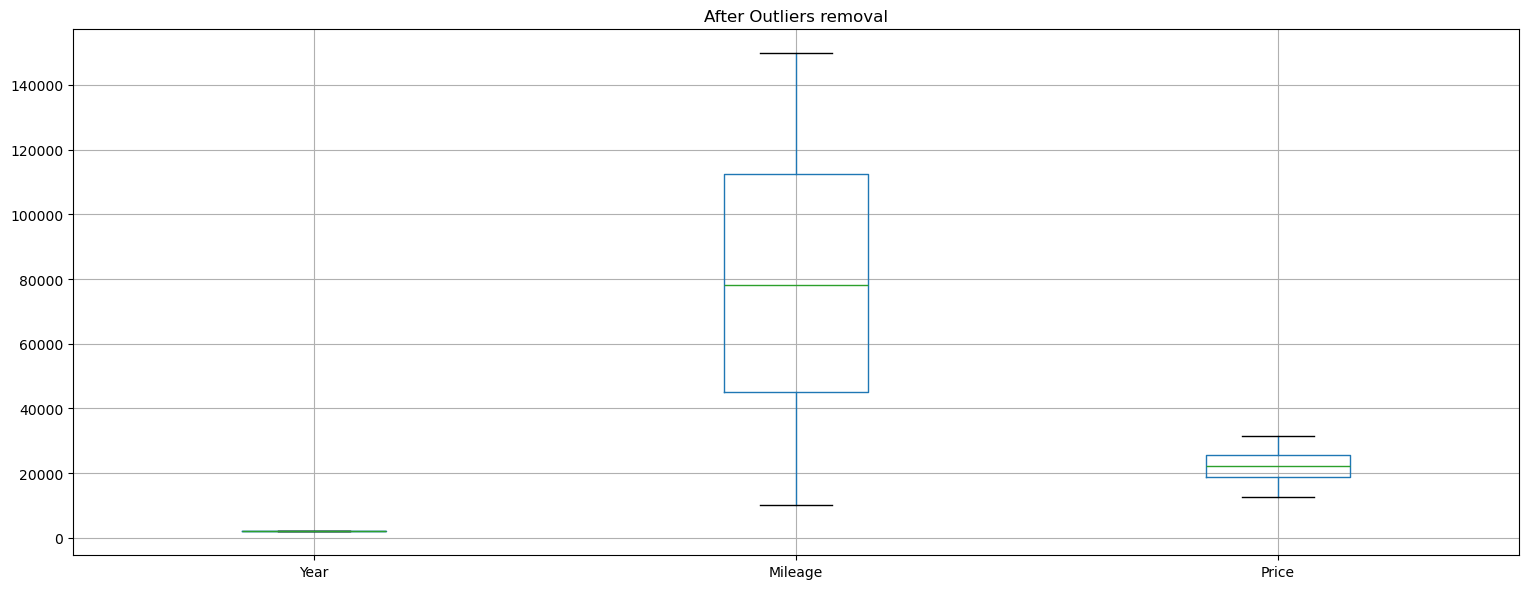

In [18]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
data_cleaned.boxplot()
plt.title("After Outliers removal")
plt.tight_layout()
plt.show()

# 4. Data Transformation

## Normalization

__Defination:__
- Values are scaled to a fixed range, typically [0, 1].
- Compresses or stretches the data to fit within the specified range, potentially altering the original distribution.

__Use Cases:__

- Suitable for distance-based algorithms, like k-nearest neighbors and neural networks.

In [19]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = data.select_dtypes(include=['float64']).columns
numeric_data = data[numeric_cols]
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)
scaled_numeric_data = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)
non_numeric_data = data.drop(columns=numeric_cols).reset_index(drop=True)
scaled_data = pd.concat([scaled_numeric_data, non_numeric_data], axis=1)
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(1000, 6)

************************************************************


,Price,Year,Mileage,Make,Model,Condition
0,0.344739,2022,18107,Ford,Silverado,Excellent
1,0.782267,2014,13578,Toyota,Silverado,Excellent
2,0.589531,2016,46054,Chevrolet,Civic,Good
3,0.299866,2022,34981,Ford,Civic,Excellent
4,0.383411,2019,63565,Chevrolet,Civic,Excellent


## Strandarization

__Defination:__
- Values are rescaled to have a mean of 0 and a standard deviation of 1.
- Preserves the shape of the original distribution but changes the scale.

__Use Cases:__
- Standardization: Suitable for algorithms that assume a normal distribution, like linear regression and logistic regression.


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

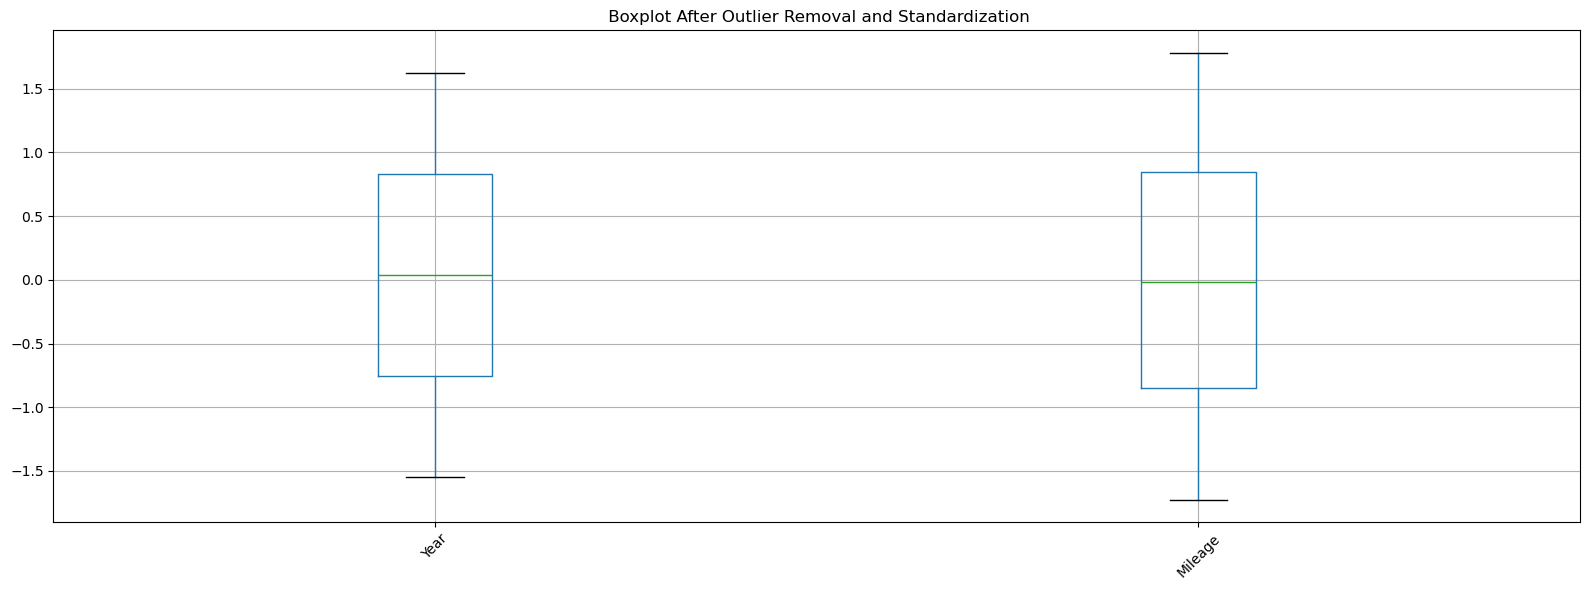

In [21]:
numeric_cols = ['Year', 'Mileage']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned[numeric_cols]), columns=numeric_cols)
plt.figure(figsize=(16, 6))
data_scaled.boxplot()
plt.title(" Boxplot After Outlier Removal and Standardization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Linear Regression

In [22]:
data = pd.get_dummies(data, columns=['Make', 'Model', 'Condition'], drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

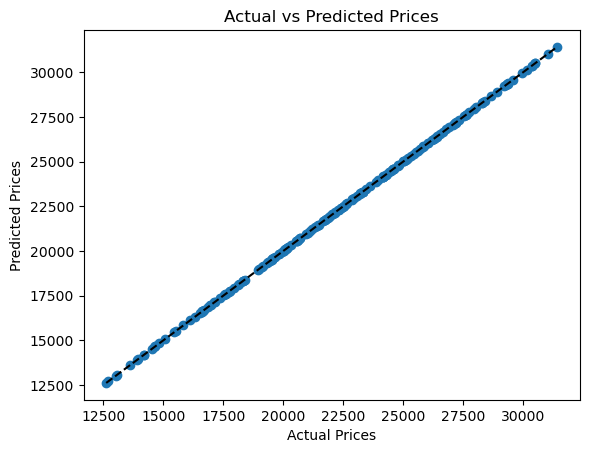

In [24]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [25]:
print("\nModel intercept:", model.intercept_)
print("Model coefficients:", model.coef_)


Model intercept: 22195.22025205096
Model coefficients: [-3.78057650e+03 -1.99112027e+03 -1.26601433e-02 -5.30518575e-03
 -6.22747931e-03  2.64329142e-04 -8.18642887e-03 -7.38509799e-03
 -6.33075084e-03 -3.84931661e-03  3.87666936e-03 -1.36023867e-02]


In [26]:
print("\nModel Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


Model Evaluation:
MAE: 0.06
MSE: 0.00
RMSE: 0.07


In [27]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print("\nActual vs Predicted prices:")
print(df_preds.head(10))


Actual vs Predicted prices:
       Actual     Predicted
521  30510.55  30510.517918
737  24488.75  24488.716487
740  30455.25  30455.407367
660  24797.40  24797.456164
411  21920.65  21920.603500
678  27172.90  27172.857127
626  29334.80  29334.735831
513  29353.05  29353.009241
859  24816.70  24816.647073
136  22315.40  22315.336751


In [28]:
def predict_car_price():
    global model
    print("\nEnter car details for price prediction (select by number):")
    makes = sorted(list({col.replace("Make_", "") for col in X.columns if col.startswith("Make_")}))
    models = sorted(list({col.replace("Model_", "") for col in X.columns if col.startswith("Model_")}))
    conditions = sorted(list({col.replace("Condition_", "") for col in X.columns if col.startswith("Condition_")}))
    print("\nAvailable Makes:")
    for i, make in enumerate(makes):
        print(f"{i}: {make}")
    make_idx = int(input("Enter Make number: "))
    selected_make = makes[make_idx]
    
    print("\nAvailable Models:")
    for i, model_name in enumerate(models):
        print(f"{i}: {model_name}")
    model_idx = int(input("Enter Model number: "))
    selected_model = models[model_idx]
    
    print("\nAvailable Conditions:")
    for i, cond in enumerate(conditions):
        print(f"{i}: {cond}")
    condition_idx = int(input("Enter Condition number: "))
    selected_condition = conditions[condition_idx]
    year = int(input("\nEnter Model Year (e.g., 2020): "))
    mileage = float(input("Enter Mileage (in KM): "))
    year_scaled, mileage_scaled = scaler.transform([[year, mileage]])[0]
    input_data = pd.DataFrame(0, index=[0], columns=X.columns)
    input_data['Year'] = year_scaled
    input_data['Mileage'] = mileage_scaled
    make_col = f"Make_{selected_make}"
    model_col = f"Model_{selected_model}"
    condition_col = f"Condition_{selected_condition}"
    
    if make_col in input_data.columns:
        input_data[make_col] = 1
    if model_col in input_data.columns:
        input_data[model_col] = 1
    if condition_col in input_data.columns:
        input_data[condition_col] = 1
    predicted_price = model.predict(input_data)[0] / 1000
    print(f"\nPredicted Price: Rs {predicted_price:,.2f} Lakhs")

In [29]:
predict_car_price()


Enter car details for price prediction (select by number):

Available Makes:
0: Ford
1: Honda
2: Nissan
3: Toyota


Enter Make number:  1



Available Models:
0: Camry
1: Civic
2: F-150
3: Silverado


Enter Model number:  1



Available Conditions:
0: Fair
1: Good


Enter Condition number:  1

Enter Model Year (e.g., 2020):  2022
Enter Mileage (in KM):  2000



Predicted Price: Rs 19.90 Lakhs


C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
